In [ ]:
from google.colab import drive
drive.mount("content")

Mounted at content


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

In [ ]:
train=pd.read_csv("/content/content/MyDrive/model_line/model_line/high/train_high_line.csv",header=None)
test=pd.read_csv("/content/content/MyDrive/model_line/model_line/high/test_high_line.csv",header=None)
vali=pd.read_csv("/content/content/MyDrive/model_line/model_line/high/valid_high_line.csv",header=None)

In [ ]:
train.shape

(24000, 256)

In [ ]:
arr = np.array([]) # arr안에 번호가 사람 번호

for i in range(1,101):
  for j in range(240):
    arr = np.append(arr, np.array([i]))

train[256]=arr

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.011566,0.077466,0.083038,0.015121,-0.024216,0.026618,0.112943,0.067018,-0.022367,0.035899,...,-0.080380,-0.088511,0.005901,-0.000657,-0.066214,-0.061900,-0.011674,0.064162,-0.020820,1.0
1,-0.105411,0.006199,0.035219,-0.038238,-0.087385,-0.047431,0.057264,0.011541,-0.063622,-0.054354,...,-0.102607,-0.121740,-0.038993,-0.017367,-0.083201,-0.108995,-0.055099,0.004076,-0.050829,1.0
2,-0.124635,-0.101820,-0.004986,-0.009573,-0.097080,-0.078287,-0.033934,0.011788,-0.100740,-0.105788,...,-0.087241,-0.110820,-0.037730,0.000719,-0.066072,-0.119163,-0.068725,0.003512,-0.040881,1.0
3,-0.070665,-0.110059,-0.041584,0.011091,-0.073945,-0.116371,-0.065348,0.005895,-0.075523,-0.138241,...,-0.074093,-0.113909,-0.113364,-0.053677,-0.015389,-0.088530,-0.122749,-0.019986,-0.033522,1.0
4,0.164484,0.137004,0.165505,0.176745,0.186086,0.149056,0.190527,0.256168,0.278809,0.242770,...,0.168813,0.158065,0.156737,0.236019,0.242662,0.237836,0.242839,0.272923,0.371568,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.047641,0.025272,0.001593,0.008873,-0.022388,-0.055809,-0.067971,-0.044163,-0.045987,-0.032190,...,-0.062754,0.002815,-0.032905,-0.016336,-0.045078,0.004621,-0.020431,0.005698,-0.048605,100.0
23996,-0.017653,0.005880,-0.008398,-0.053956,-0.045114,-0.050892,-0.014791,-0.025570,-0.044989,-0.027848,...,-0.017953,0.000676,0.008635,-0.010605,0.004606,0.032398,0.011841,-0.004365,0.032981,100.0
23997,0.020267,0.062224,-0.014968,0.012301,0.073691,0.025622,0.056645,0.040058,0.073452,0.061997,...,-0.057440,-0.065800,-0.044000,-0.082399,-0.083447,-0.065335,-0.088911,-0.080017,-0.076062,100.0
23998,-0.091136,-0.072359,-0.082491,-0.096773,-0.108624,-0.106044,-0.096813,-0.094621,-0.049099,-0.103425,...,-0.095215,-0.045811,-0.093347,-0.052513,-0.086620,-0.069087,-0.056044,-0.095822,-0.080069,100.0


In [ ]:
arr_t = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_t = np.append(arr_t, np.array([i]))

arr_v = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_v = np.append(arr_v, np.array([i]))

test[256]=arr_t
vali[256]=arr_v
vali

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.088677,-0.125790,-0.030982,0.007508,-0.029261,-0.106478,-0.080494,-0.011038,-0.021531,-0.121852,...,0.017174,-0.070759,-0.096122,0.007007,-0.004853,-0.026522,-0.062090,0.001993,0.019837,1.0
1,-0.166172,-0.207399,-0.221436,-0.207283,-0.178781,-0.161000,-0.193089,-0.206398,-0.157608,-0.133839,...,-0.207781,-0.165102,-0.191124,-0.196126,-0.205478,-0.184471,-0.151804,-0.194417,-0.193371,1.0
2,-0.145358,-0.148342,-0.020535,-0.017398,-0.130030,-0.147643,-0.060204,0.013275,-0.095876,-0.130336,...,-0.085840,-0.182494,-0.152887,-0.014291,-0.043764,-0.122897,-0.128260,-0.017722,-0.028884,1.0
3,0.071963,0.015509,-0.112935,-0.062499,0.079877,-0.016757,-0.127871,-0.039045,0.030101,0.042338,...,-0.033357,0.015213,-0.075836,-0.154705,-0.100604,-0.008633,0.015829,0.039830,0.248372,1.0
4,-0.041662,0.030685,-0.020187,-0.129210,-0.085054,0.044992,0.021448,-0.110557,-0.113222,-0.015198,...,-0.124194,-0.064253,-0.014054,-0.089064,-0.151946,-0.088977,-0.031070,-0.035743,-0.117336,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.032231,0.030567,-0.020890,0.050221,0.017189,-0.008196,-0.015203,-0.032563,-0.038065,-0.040280,...,-0.038393,-0.042812,-0.032542,0.037526,-0.009246,0.006291,0.019648,-0.020407,-0.015023,100.0
5996,-0.196898,-0.177660,-0.151701,-0.170922,-0.196274,-0.164125,-0.167807,-0.145068,-0.153429,-0.147951,...,-0.014796,0.048950,0.007776,0.021993,0.008940,0.032578,0.035396,0.003384,0.046122,100.0
5997,0.014198,-0.011697,-0.009543,-0.048490,-0.005837,0.002504,-0.030444,0.011946,0.002635,0.027564,...,-0.081514,-0.086519,-0.102934,-0.041559,-0.065864,-0.047559,-0.085704,-0.048828,-0.085453,100.0
5998,-0.048497,-0.030079,-0.042822,-0.063725,-0.028908,-0.011291,-0.015405,-0.037688,-0.033962,-0.027736,...,-0.023651,-0.016484,-0.058906,0.005502,-0.050809,-0.055031,-0.001622,-0.067492,-0.039172,100.0


In [ ]:
arr

array([  1.,   1.,   1., ..., 100., 100., 100.])

In [ ]:
y_train = to_categorical(train[256])
y_test = to_categorical(test[256])
y_val = to_categorical(vali[256])
y_train[:241]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train.drop([256], axis=1, inplace=True)
test.drop([256], axis=1, inplace=True)
vali.drop([256], axis=1, inplace=True)
train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.011566,0.077466,0.083038,0.015121,-0.024216,0.026618,0.112943,0.067018,-0.022367,0.035899,...,0.010081,-0.080380,-0.088511,0.005901,-0.000657,-0.066214,-0.061900,-0.011674,0.064162,-0.020820
1,-0.105411,0.006199,0.035219,-0.038238,-0.087385,-0.047431,0.057264,0.011541,-0.063622,-0.054354,...,-0.014515,-0.102607,-0.121740,-0.038993,-0.017367,-0.083201,-0.108995,-0.055099,0.004076,-0.050829
2,-0.124635,-0.101820,-0.004986,-0.009573,-0.097080,-0.078287,-0.033934,0.011788,-0.100740,-0.105788,...,0.008528,-0.087241,-0.110820,-0.037730,0.000719,-0.066072,-0.119163,-0.068725,0.003512,-0.040881
3,-0.070665,-0.110059,-0.041584,0.011091,-0.073945,-0.116371,-0.065348,0.005895,-0.075523,-0.138241,...,-0.018326,-0.074093,-0.113909,-0.113364,-0.053677,-0.015389,-0.088530,-0.122749,-0.019986,-0.033522
4,0.164484,0.137004,0.165505,0.176745,0.186086,0.149056,0.190527,0.256168,0.278809,0.242770,...,0.165532,0.168813,0.158065,0.156737,0.236019,0.242662,0.237836,0.242839,0.272923,0.371568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.047641,0.025272,0.001593,0.008873,-0.022388,-0.055809,-0.067971,-0.044163,-0.045987,-0.032190,...,0.017286,-0.062754,0.002815,-0.032905,-0.016336,-0.045078,0.004621,-0.020431,0.005698,-0.048605
23996,-0.017653,0.005880,-0.008398,-0.053956,-0.045114,-0.050892,-0.014791,-0.025570,-0.044989,-0.027848,...,-0.058060,-0.017953,0.000676,0.008635,-0.010605,0.004606,0.032398,0.011841,-0.004365,0.032981
23997,0.020267,0.062224,-0.014968,0.012301,0.073691,0.025622,0.056645,0.040058,0.073452,0.061997,...,-0.039918,-0.057440,-0.065800,-0.044000,-0.082399,-0.083447,-0.065335,-0.088911,-0.080017,-0.076062
23998,-0.091136,-0.072359,-0.082491,-0.096773,-0.108624,-0.106044,-0.096813,-0.094621,-0.049099,-0.103425,...,-0.069209,-0.095215,-0.045811,-0.093347,-0.052513,-0.086620,-0.069087,-0.056044,-0.095822,-0.080069


In [ ]:
X_train=train.values
X_test=test.values
X_val=vali.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [ ]:
# X_train = X_train.reshape(1, 256, 24000)
# X_test = X_test.reshape(1, 256, 6000)
# X_val = X_val.reshape(1, 256, 6000)
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(256,1))) #shape[1]=열
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 256, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 256, 50)           30200     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dropout (Dropout)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 101)               1292901   
                                                                 
Total params: 1,444,301
Trainable params: 1,444,301
Non-

In [ ]:
print(X_train.shape)
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 1500, verbose = 1, validation_data=(X_val, y_val))

(24000, 256, 1)
Epoch 1/1500
24/24 [==============================] - 14s 216ms/step - loss: 0.0098 - accuracy: 0.0106 - val_loss: 0.0098 - val_accuracy: 0.0100
Epoch 2/1500
24/24 [==============================] - 4s 176ms/step - loss: 0.0098 - accuracy: 0.0096 - val_loss: 0.0098 - val_accuracy: 0.0082
Epoch 3/1500
24/24 [==============================] - 4s 177ms/step - loss: 0.0098 - accuracy: 0.0107 - val_loss: 0.0098 - val_accuracy: 0.0133
Epoch 4/1500
24/24 [==============================] - 4s 179ms/step - loss: 0.0098 - accuracy: 0.0092 - val_loss: 0.0098 - val_accuracy: 0.0092
Epoch 5/1500
24/24 [==============================] - 4s 180ms/step - loss: 0.0098 - accuracy: 0.0082 - val_loss: 0.0098 - val_accuracy: 0.0092
Epoch 6/1500
24/24 [==============================] - 4s 180ms/step - loss: 0.0098 - accuracy: 0.0096 - val_loss: 0.0098 - val_accuracy: 0.0123
Epoch 7/1500
24/24 [==============================] - 4s 180ms/step - loss: 0.0098 - accuracy: 0.0098 - val_loss: 0.009

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


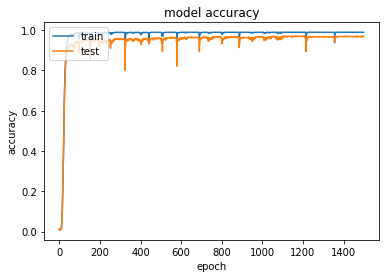

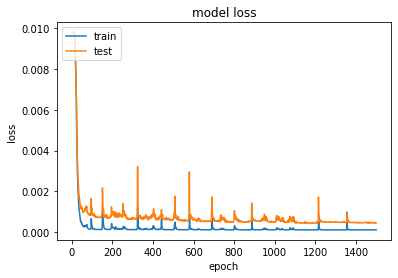

In [ ]:
import matplotlib.pyplot as plt
# Fit the model
results = history
# list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 


In [ ]:
model.save('SupervisedLstm(high).h5')